In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
mask_data = np.load("/home/ubuntu/mucilage_pipeline/mucilage-detection/roboflow_dataset/saved_masks/train_masks_augmented.npz")
print(mask_data['masks'].shape)

# Count mucilage pixels (1) in each mask
mucilage_pixel_counts = 0
total_pixels = 0
for mask in mask_data['masks']:
    mucilage_pixel_count = np.sum(mask == 1)
    mucilage_pixel_counts += mucilage_pixel_count  
    total_pixels += mask.size

print(mucilage_pixel_counts)
# Calculate the percentage of mucilage pixels
mucilage_percentage = (mucilage_pixel_counts / total_pixels) * 100
print(f"Percentage of mucilage pixels: {mucilage_percentage:.2f}%")

(1417, 256, 256)
799616
Percentage of mucilage pixels: 0.86%


In [3]:
train_positive = np.load("/home/ubuntu/mucilage_pipeline/mucilage-detection/saved_npy/train_positive.npz")['X']
print(train_positive.shape)

(154, 256, 256, 11)


In [3]:
# compare shapes train_positive and patches csv that have label 1
train_positive = np.load("/home/ubuntu/mucilage_pipeline/mucilage-detection/saved_npy/train_positive.npz")['X']
print(train_positive.shape)

# Load patches CSV
import pandas as pd
patches_df = pd.read_csv("/home/ubuntu/mucilage_pipeline/mucilage-detection/csv/patches_final_filtered_split.csv")
print(patches_df[patches_df['label'] == 1].shape)

(154, 256, 256, 11)
(226, 5)


Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0]


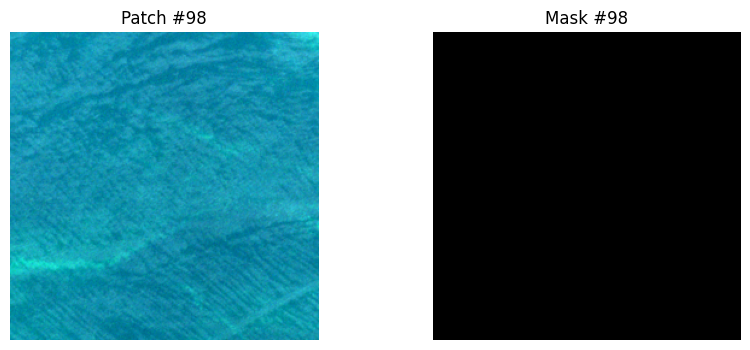

Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0]


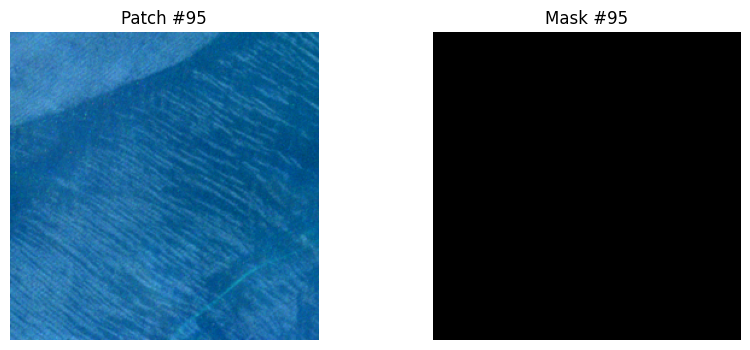

Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0]


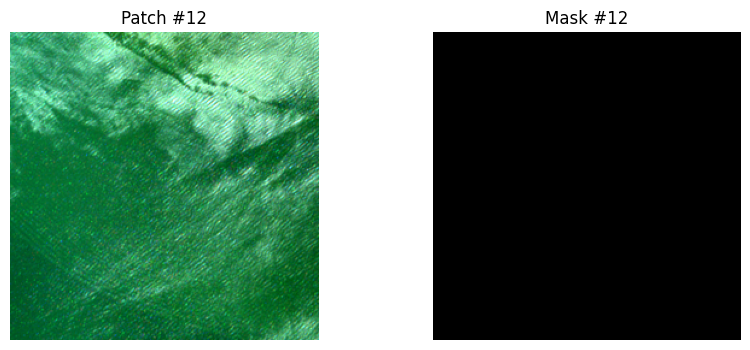

Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0]


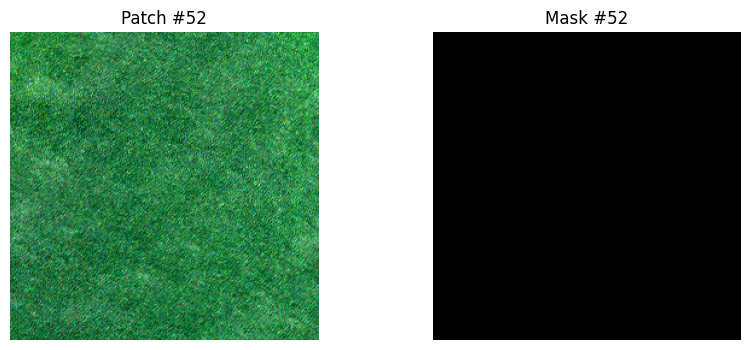

Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0]


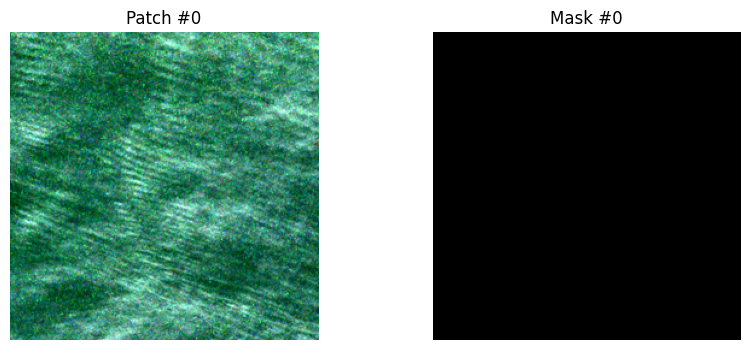

Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0]


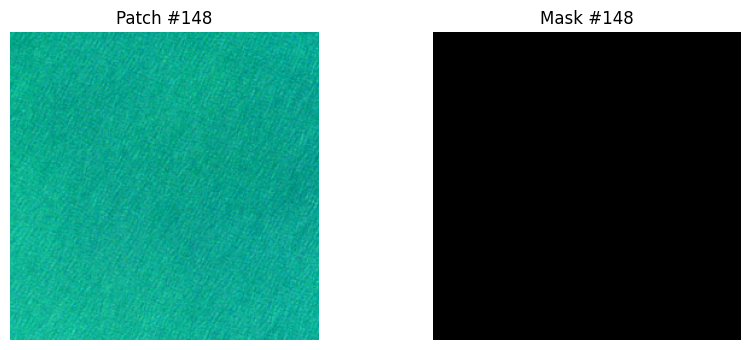

Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0]


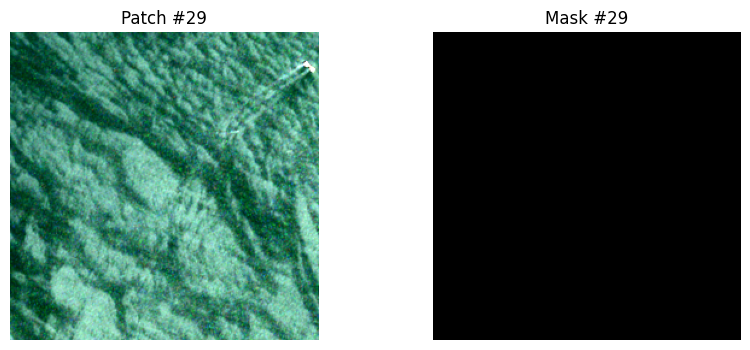

Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0]


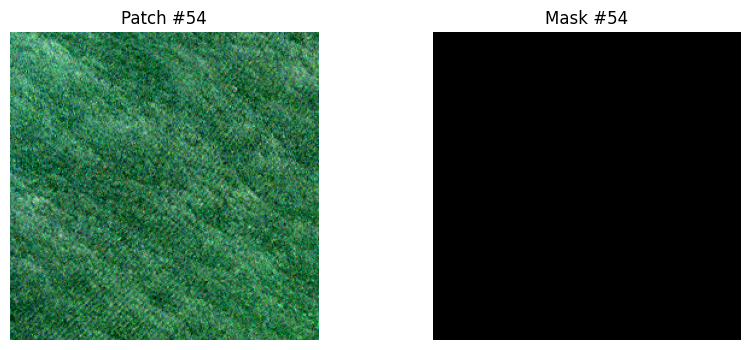

Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0]


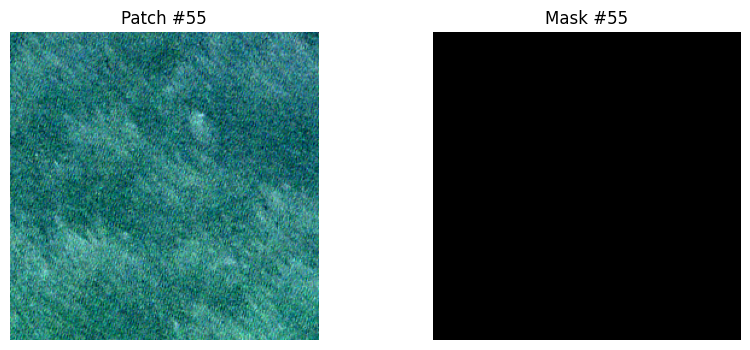

Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0 1]


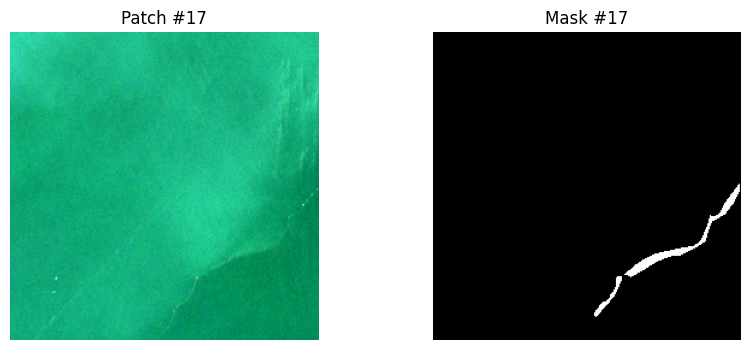

Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0]


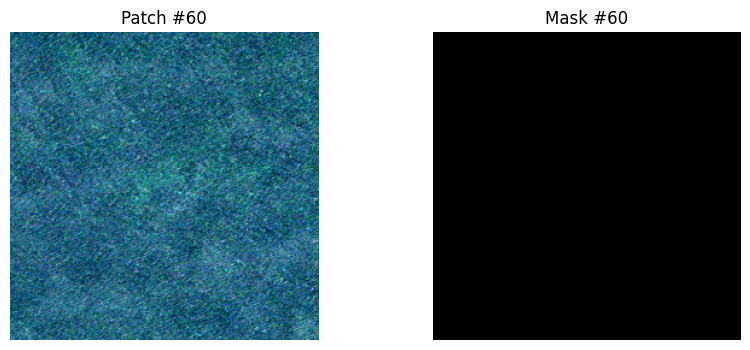

Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0]


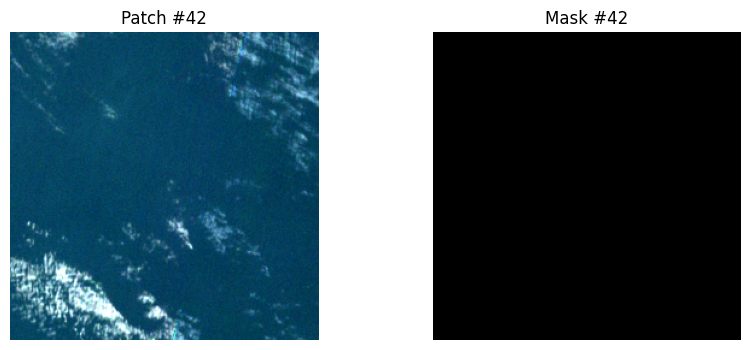

Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0]


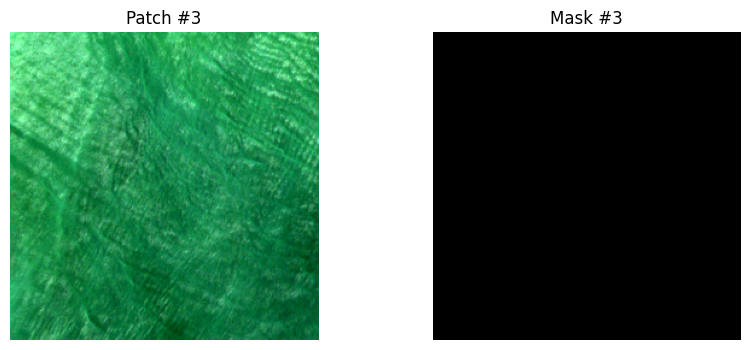

Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0]


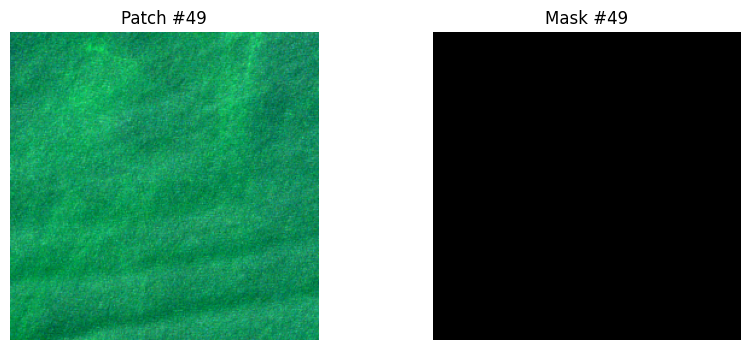

Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0]


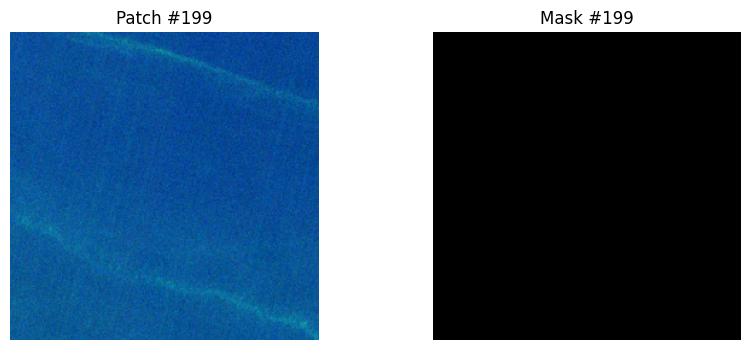

Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0]


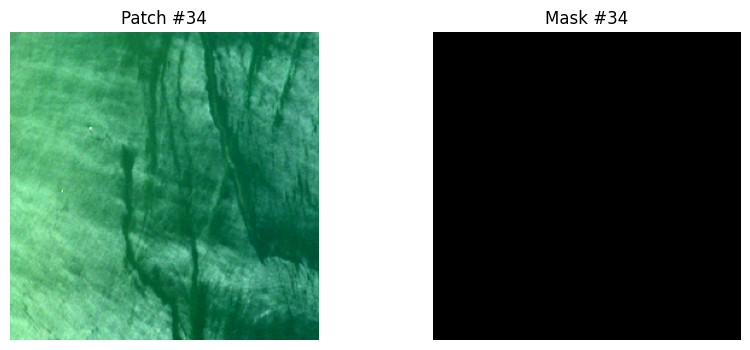

Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0 1]


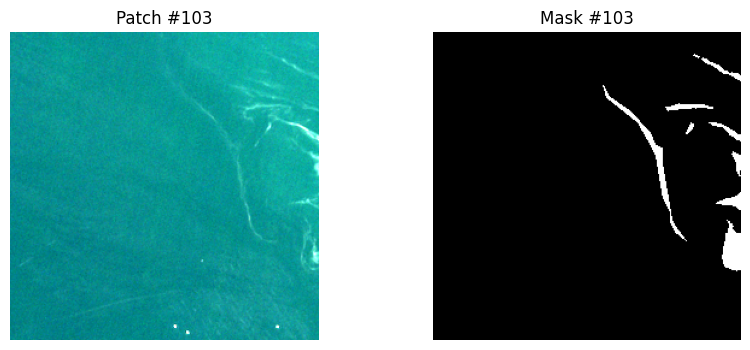

Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0]


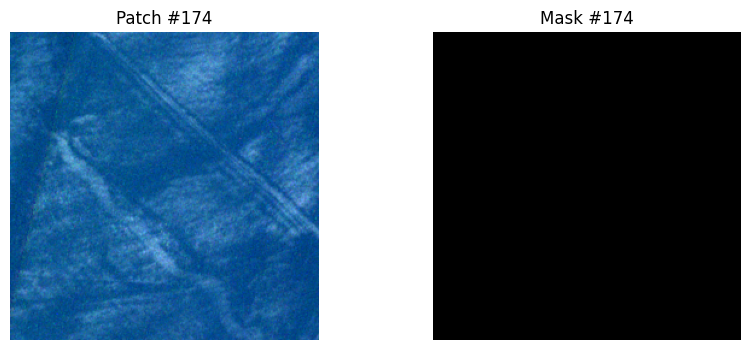

Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0 1]


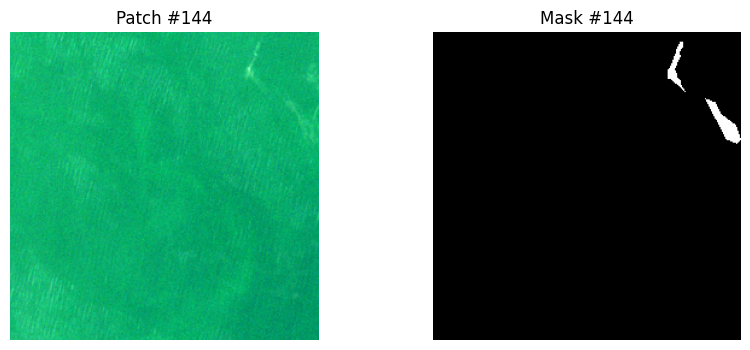

Patch shape: (256, 256, 11), Mask shape: (256, 256), Unique mask values: [0 1]


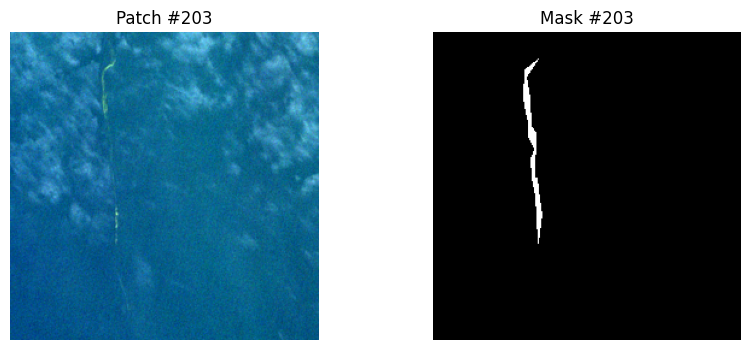

In [5]:
# Load patches and masks
patch_data = np.load("/home/ubuntu/mucilage_pipeline/mucilage-detection/saved_npy/test_cache.npz")["X"]  # (N, H, W, C)
mask_data = np.load("/home/ubuntu/mucilage_pipeline/mucilage-detection/roboflow_dataset/saved_masks/test_masks.npz")['masks']

indices = np.random.choice(len(patch_data), size=20, replace=False)

for i in indices:
    patch = patch_data[i]  # (H, W, C)
    mask = mask_data[i]    # (H, W)
    print(f"Patch shape: {patch.shape}, Mask shape: {mask.shape}, Unique mask values: {np.unique(mask)}")
    
    # --- RGB Visualization ---
    # Sentinel-2 typical RGB bands = B04 (red), B03 (green), B02 (blue)
    rgb = patch[:, :, [3, 2, 1]]
    
    # Percentile stretch for visualization
    p2, p98 = np.nanpercentile(rgb, (2, 98))
    rgb = np.clip((rgb - p2) / (p98 - p2 + 1e-6), 0, 1)
    rgb = (rgb * 255).astype(np.uint8)
    
    # --- Plot ---
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(rgb)
    plt.title(f"Patch #{i}")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap="gray")
    plt.title(f"Mask #{i}")
    plt.axis("off")
    
    plt.show()

In [ ]:
# Load patches and masks
patch_data = np.load("/home/ubuntu/mucilage_pipeline/mucilage-detection/saved_npy/train_positive.npz")["X"]  # (N, H, W, C)
mask_data = np.load("/home/ubuntu/mucilage_pipeline/mucilage-detection/saved_npy/train_positive_new.npz")["X"] 
#mask_data = np.load("/home/ubuntu/mucilage_pipeline/mucilage-detection/roboflow_dataset_all/saved_masks/train_masks.npz")['masks']

indices = np.random.choice(len(patch_data), size=20, replace=False)

for i in indices:
    patch = patch_data[i]  # (H, W, C)
    mask = mask_data[i]    # (H, W)
    print(f"Patch shape: {patch.shape}, Mask shape: {mask.shape}")
    
    # --- RGB Visualization ---
    # Sentinel-2 typical RGB bands = B04 (red), B03 (green), B02 (blue)
    rgb = patch[:, :, [3, 2, 1]]
    rgb_2 = mask[:, :, [3, 2, 1]]
    
    # Percentile stretch for visualization
    p2, p98 = np.nanpercentile(rgb, (2, 98))
    rgb = np.clip((rgb - p2) / (p98 - p2 + 1e-6), 0, 1)
    rgb = (rgb * 255).astype(np.uint8)

    p2_2, p98_2 = np.nanpercentile(rgb_2, (2, 98))
    rgb_2 = np.clip((rgb_2 - p2_2) / (p98_2 - p2_2 + 1e-6), 0, 1)
    rgb_2 = (rgb_2 * 255).astype(np.uint8)
    
    # --- Plot ---
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(rgb)
    plt.title(f"Patch #{i}")
    plt.axis("off")
    
    plt.subplot(1,2,2)
    plt.imshow(rgb_2)
    plt.title(f"Patch #{i}")
    plt.axis("off")
    
    plt.show()